In [1]:
#This Notebook presents a code to do a decompositon onto Alfven Slow and Fast modes
#Darryl Seligman version1 9/11/18
#Adapted from version of code by Jonathan Squire
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import *
def mode_decomp(Vx,Vy,Vz,beta):
    n=Vx.shape[0]
    
    N=[n,n,n]
    L=[1.,1.,1.]
    if(n%2==0):
        b=np.arange(0,N[0]/2)
        bb = np.linspace(-N[0]/2.,-1,N[0]/2)
    else:
        print "hello"
        b=np.arange(0,N[0]/2)
        bb = np.linspace(-N[0]/2.,-1.5,N[0]/2)
        bb=np.append(bb,[.5])
    print np.concatenate((b,bb))
    print np.concatenate((b,bb)).shape
    kx=  2*np.pi*1j/L[0]*np.concatenate((b,bb))
    ky=  2*np.pi*1j/L[1]*np.concatenate((b,bb))
    kz=  2*np.pi*1j/L[2]*np.concatenate((b,bb))
    print kx.shape
    xg=np.linspace(0.,1.,n)
    yg=np.linspace(0.,1.,n)
    zg=np.linspace(0.,1.,n)
    x,y,az=np.meshgrid(xg,yg,zg,indexing='ij')
    KX,KY,KZ= np.meshgrid(kx,ky,kz,indexing='ij')

    Kmag = np.sqrt(abs(KX**2+KY**2+KZ**2))
    Kperp = np.sqrt(abs(KY**2+KZ**2))
    Kmag[0]=1.
    khx = KX/Kmag;
    khy = KY/Kmag;
    khz = KZ/Kmag;
    kgrid = np.arange(0,max(ky.imag)+2.*np.pi/L[0],2.*np.pi/L[0])

    kgridG = (kgrid[0:kgrid.size-1] +  kgrid[1:kgrid.size])/2;   

    fVx = fftn(Vx);
    fVy = fftn(Vy); 
    fVz = fftn(Vz);
    
    kcbhx = 0;
    kcbhy = (khz);
    kcbhz =  - (khy);
    print fVy.shape
    print fVz.shape
    print kcbhy.shape
    print kcbhz.shape
    alfV =  kcbhy*fVy + kcbhz*fVz;

    cmpVx = fVx;
    cmpVy = fVy + kcbhy*alfV;
    cmpVz = fVz + kcbhz*alfV;
    
    costh = abs(khx);
    sinth = np.sqrt(1-costh**2);
    thx = -sinth*np.sign(KX);

    Kperp[Kperp==0]=1.;
    thy = costh*(KY/Kperp);
    thz = costh*(KZ/Kperp);
    slowV = -thx*fVx - thy*fVy - thz*fVz + costh*sinth/beta*(khx*fVx + khy*fVy + khz*fVz);
    fastV = costh*sinth/beta*(thx*fVx + thy*fVy + thz*fVz) + khx*fVx + khy*fVy + khz*fVz;
    
    alfVIso = spect1D((alfV),Kmag,kgrid)
    VIso = spect1D(fVx,Kmag,kgrid) + spect1D(fVy,Kmag,kgrid) + spect1D(fVz,Kmag,kgrid); #% velocity spectrum
    SpFIso =spect1D(cmpVx,Kmag,kgrid) + spect1D(cmpVy,Kmag,kgrid) + spect1D(cmpVz,Kmag,kgrid); #% Compressive part (slow+fast) of the velocity
    slowVIso = spect1D((slowV),Kmag,kgrid); #% Slow mode part
    fastVIso = spect1D((fastV),Kmag,kgrid); #% Fast mode part
    return(kgridG,alfVIso,fastVIso,slowVIso)
def spect1D(v1,K,kgrid):
    # % Function to find the spectrum <v1^2>,
    #% K is the kgrid associated with v1
    #% kgrid is the grid for spectral shell binning
    nk = len(kgrid)-1;
    print nk
    out1 = np.zeros((nk))
    NT2 = K.size**2;
    for kk in np.arange(nk):

        out1[kk]= np.sum(abs(v1[(K<kgrid[kk+1]) & (K>kgrid[kk])])**2 )/NT2;

    return out1   

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63. -64. -63. -62. -61. -60. -59. -58. -57. -56. -55. -54.
 -53. -52. -51. -50. -49. -48. -47. -46. -45. -44. -43. -42. -41. -40. -39.
 -38. -37. -36. -35. -34. -33. -32. -31. -30. -29. -28. -27. -26. -25. -24.
 -23. -22. -21. -20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.
  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.]
(128,)
(128,)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
63
63
63
63
63
63
63
63
63


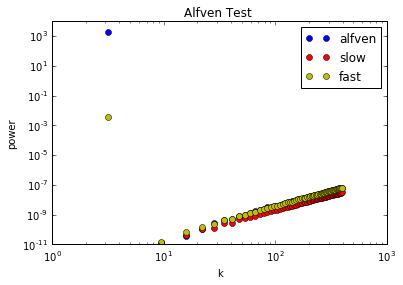

In [13]:
beta=128;
n=128
xg=np.linspace(0.,1.,n)
yg=np.linspace(0.,1.,n)
zg=np.linspace(0.,1.,n)
x,y,z=np.meshgrid(xg,yg,zg,indexing='ij')
Vx = np.zeros((n,n,n))
Vz = np.zeros((n,n,n))+.01*np.random.rand(n,n,n)
Vy = 10.1*np.sin(2.*128.*np.pi*z)

kgridG,alfVIso,fastVIso,slowVIso=mode_decomp(Vx,Vy,Vz,beta)
plt.loglog(kgridG,alfVIso,'bo',label='alfven')
plt.loglog(kgridG,slowVIso,'ro',label='slow')
plt.loglog(kgridG,fastVIso,'yo',label='fast')
plt.legend()
plt.xlabel('k')
plt.ylabel('power')
plt.title('Alfven Test ')